# LSA Dan Clustering Menggunakan K-Means

LSA (Latent Semantic Analysis) juga dikenal sebagai LSI (Latent Semantic Index). LSA menggunakan Bag of Word(BoW) model yang nantinya akan menghasilkan term-document matrix. Baris mewakili istilah dan kolom mewakili dokumen. LSA mempelajari topik laten dengan melakukan dekomposisi matriks pada matriks istilah dokumen menggunakan dekomposisi nilai Singular. Beberapa langkah yang harus dilakukan yaitu :

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi. K Means Clustering memiliki objective yaitu meminimalisasi object function yang telah di atur pada proses clasterisasi. Dengan cara minimalisasi variasi antar 1 cluster dengan maksimalisasi variasi dengan data di cluster lainnya. Clustering Algoritma (K-Means) memiliki tujuan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan tersebut dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.

### 1. Crawling Data

Untuk dapat melakukan crawling data, gunakan library scrapy. Install terlebih dahulu scrapynya dengan mengetikkan perintah dibawah ini pada command prompt atau Anaconda Prompt.

In [1]:
!pip install scrapy

Lalu setelah proses selesai, jalankan perintah untuk melakukan setup untuk mulai melakukan crawling.

In [2]:
import scrapy
from scrapy.crawler import CrawlerProcess

Selanjutnya membuat code untuk melakukan crawling data

In [3]:
import scrapy


class ptacrawl(scrapy.Spider):
    name = "pta"
    custom_settings = {
        'FEED_FORMAT': 'csv',
        'FEED_URI': 'pta.csv'
        }

    def start_requests(self):
        x = 100000
        for i in range (1,30):
            x +=1
            urls = [
                'https://pta.trunojoyo.ac.id/welcome/detail/080211'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/100211'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/090211'+str(x),
                'https://pta.trunojoyo.ac.id/welcome/detail/070211'+str(x),
                
            ]
            for url in urls:
                yield scrapy.Request(url=url, callback=self.parse)

    def parse(self, response):
        yield{
            'judul':response.css('#content_journal > ul > li > div:nth-child(2) > a::text').extract(),
            'Penulis':response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(2) > span::text').extract(),
            'Pembimbing 1':response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(3) > span::text').extract(),
            'Pembimbing 2':response.css('#content_journal > ul > li > div:nth-child(2) > div:nth-child(4) > span::text').extract(),
            'Abstrak':response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(2) > p::text').extract(),
            'Abstract':response.css('#content_journal > ul > li > div:nth-child(4) > div:nth-child(4) > p::text').extract()
        }
        
proses = CrawlerProcess()
proses.crawl(ptacrawl)
proses.start()

2022-06-30 17:56:40 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-06-30 17:56:40 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.4.0, Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 21.0.0 (OpenSSL 1.1.1n  15 Mar 2022), cryptography 3.4.8, Platform Windows-10-10.0.22000-SP0
2022-06-30 17:56:40 [scrapy.crawler] INFO: Overridden settings:
{}
2022-06-30 17:56:40 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-06-30 17:56:40 [scrapy.extensions.telnet] INFO: Telnet Password: 9a303ada1d99230d
2022-06-30 17:56:40 [py.warnings] WARNING: C:\Users\62813\anaconda3\lib\site-packages\scrapy\extensions\feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)

2022-06-

Maka akan tampil hasil dari crawling dalam bentuk file csv. Langkah selanjutnya yang perlu dilakukan adalah preprocessing.

### 2. Preprocessing

In [163]:
!pip install nltk
!pip install Sastrawi

In [12]:
import pandas as pd
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\62813\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\62813\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\62813\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\62813\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\62813\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

load dataset yang akan di preprocessing dengan menggunakan library pandas untuk membaca file csv.

In [24]:
#import data frame
dataCSV = pd.read_csv('pta.csv')
dataCSV.head()

,judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,Abstract
0,Pengembangan Sumber Daya Manusia Dalam Rangka ...,Penulis : Ismie Novitasari Soekarno,Dosen Pembimbing I : Dra. Hj. S. Anugrahini Ir...,"Dosen Pembimbing II :Faidal. S.E, MM",ABSTRAK\r\nPenelitian ini bertujuan untuk mene...,ABSTRACT\r\nThis study aimed to examine whethe...
1,NaN,NaN,NaN,NaN,NaN,NaN
2,ANALISIS BIAYA PENGADAAN AKTIVA TETAP DENGAN M...,Penulis : SANDY ETIKA SUSANTO,"Dosen Pembimbing I : Hj. Evaliati Amaniyah, SE...","Dosen Pembimbing II :Purnamawati, SE., M.Si",PT. Kereta Api Indonesia (KAI) merupakan salah...,PT. Kereta Api Indonesia (KAI) is one of the S...
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


Hilangkan Missing Value

In [25]:
dataCSV = dataCSV.dropna(how='any',axis=0) 
dataCSV.head()

,judul,Penulis,Pembimbing 1,Pembimbing 2,Abstrak,Abstract
0,Pengembangan Sumber Daya Manusia Dalam Rangka ...,Penulis : Ismie Novitasari Soekarno,Dosen Pembimbing I : Dra. Hj. S. Anugrahini Ir...,"Dosen Pembimbing II :Faidal. S.E, MM",ABSTRAK\r\nPenelitian ini bertujuan untuk mene...,ABSTRACT\r\nThis study aimed to examine whethe...
2,ANALISIS BIAYA PENGADAAN AKTIVA TETAP DENGAN M...,Penulis : SANDY ETIKA SUSANTO,"Dosen Pembimbing I : Hj. Evaliati Amaniyah, SE...","Dosen Pembimbing II :Purnamawati, SE., M.Si",PT. Kereta Api Indonesia (KAI) merupakan salah...,PT. Kereta Api Indonesia (KAI) is one of the S...
5,PENGARUH UNSUR - UNSUR KOMUNIKASI TERHADAP PRO...,Penulis : Miftahurrahman,Dosen Pembimbing I : Dr. Muhammad Alkirom Wild...,"Dosen Pembimbing II :Helmi Buyung Aulia S, ST....",ABSTRAK\r\n\r\n\tPenelitian ini bertujuan untu...,ABSTRACT\t\r\nThe objectives of this study are...
6,PENGARUH ATRIBUT PRODUK TERHADAP KEPUTUSAN PEM...,Penulis : SUHAR,Dosen Pembimbing I : Dr.Drs. Ec. H. Muh. Syari...,"Dosen Pembimbing II :Nirma Kurriwati, SP., M.Si",Abstrak\r\n\r\nTujuan penelitian ini adalah un...,Abstract\r\n\r\nThis research is aimed to iden...
8,PERBANDINGAN PENGARUH STOCK SPLIT DAN DIVIDEN ...,Penulis : DHONY MANGGALA PUTRA,"Dosen Pembimbing I : R. GATOT HERU PRANJOTO, S...",Dosen Pembimbing II :DRS. EC. MAKHMUD ZULKIFLI...,Tujuan penelitian ini adalah untuk mengetahui ...,The purposes of this study are to determine th...


Lakukan proses stopword dan tokenizing

In [26]:
index_iloc = 0
len_df = len(dataCSV.index)
array_stopwords = []
for kata in range(len_df):
    # indexData itu ambil tiap bagian dari data frame dengan nama dataCSV
    indexData = dataCSV.iloc[index_iloc, [0]].values
    clean_words = [w for w in word_tokenize(indexData[0].lower())
                                    if w.isalpha()
                                    and w not in stopwords.words('indonesian')]
    
    array_stopwords.append(clean_words)
    index_iloc += 1

    # FreqDist(clean_words).most_common(20)
print(array_stopwords)

[['pengembangan', 'sumber', 'daya', 'manusia', 'rangka', 'meningkatkan', 'produktivitas', 'karyawan', 'pt', 'pos', 'indonesia', 'persero', 'kantor', 'cabang', 'bangkalan'], ['analisis', 'biaya', 'pengadaan', 'aktiva', 'alternatif', 'leasing', 'hutang', 'jangka', 'pt', 'kereta', 'api', 'indonesia', 'persero'], ['pengaruh', 'unsur', 'unsur', 'komunikasi', 'produktivitas', 'kerja', 'pegawai', 'negeri', 'sipil', 'dinas', 'pendidikan', 'kabupaten', 'bangkalan'], ['pengaruh', 'atribut', 'produk', 'keputusan', 'pembelian', 'produk', 'penyedap', 'masako', 'studi', 'kecamatan', 'robatal', 'sampang'], ['perbandingan', 'pengaruh', 'stock', 'split', 'dividen', 'volume', 'perdagangan', 'saham', 'perusahaan', 'go', 'public', 'bei', 'bursa', 'efek', 'indonesia'], ['pengaruh', 'iklan', 'online', 'media', 'facebook', 'keputusan', 'pembelian', 'pakaian', 'studi', 'mahasiswa', 'fakultas', 'ekonomi', 'bisnis', 'universitas', 'trunojoyo', 'madura'], ['pengaruh', 'bauran', 'pemasaran', 'keputusan', 'wisataw

Lalu proses stemming

In [27]:
# mendefinisikan function stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

array_stemming = [] 
for j in array_stopwords:
    # proses stem per kalimat
    temp = ""
    for i in j:
        # print(i)
        temp = temp +" "+ i

    hasil = stemmer.stem(temp)
    array_stemming.append(hasil)
# print('array ', array_stemming)

In [28]:
# drop judul, waktu, kategori
dataCSV.drop(['judul','Penulis','Pembimbing 1','Pembimbing 2','Abstract'],axis=1,inplace=True)
dataCSV['Abstrak'] = np.array(array_stemming)

In [29]:

dataCSV.head()

,Abstrak
0,kembang sumber daya manusia rangka tingkat pro...
2,analisis biaya ada aktiva alternatif leasing h...
5,pengaruh unsur unsur komunikasi produktivitas ...
6,pengaruh atribut produk putus beli produk seda...
8,banding pengaruh stock split dividen volume da...


In [30]:
dataCSV.to_csv('hasil_textProcessing.csv')

Data akan disimpan dalam file CSV.

## 3. TF - IDF

In [31]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
df = pd.read_csv("hasil_textProcessing.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,Abstrak
0,kembang sumber daya manusia rangka tingkat pro...
1,analisis biaya ada aktiva alternatif leasing h...
2,pengaruh unsur unsur komunikasi produktivitas ...
3,pengaruh atribut produk putus beli produk seda...
4,banding pengaruh stock split dividen volume da...


In [33]:
list_abstrak = []
for i in range(len(df.iloc[:, -1])):
    list_abstrak.append(df.iloc[i, -1])
# print(list_isi_berita)

In [35]:
count_vectorizer = CountVectorizer(min_df=1)
count_vectorizer.fit_transform(list_abstrak)

<111x353 sparse matrix of type '<class 'numpy.int64'>'
	with 1389 stored elements in Compressed Sparse Row format>

In [36]:
#get fitur
fitur = count_vectorizer.get_feature_names()

In [37]:
# term frequency dengan tfidftransformer
tf = count_vectorizer.fit_transform(list_abstrak).toarray()
df_tf =pd.DataFrame(data=tf,index=list(range(1, len(tf[:,1])+1, )),columns=[fitur])
df_tf.head(8)

,ada,adiluhung,agung,air,akademik,aktiva,aktivitas,akuntansi,alternatif,aman,...,urus,usaha,utama,vip,volume,wall,wewenang,wira,wisatawan,yayasan
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#tfidf dengan tfidf transformer
tfidf_transform = TfidfTransformer(use_idf=True,norm='l2',smooth_idf=True)
tfidf=tfidf_transform.fit_transform(count_vectorizer.fit_transform(list_abstrak)).toarray()
df_tfidf =pd.DataFrame(data=tfidf,index=list(range(1, len(tfidf[:,1])+1, )),columns=[fitur])
df_tfidf.head(8)

,ada,adiluhung,agung,air,akademik,aktiva,aktivitas,akuntansi,alternatif,aman,...,urus,usaha,utama,vip,volume,wall,wewenang,wira,wisatawan,yayasan
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.308165,0.0,0.0,0.0,0.0,0.308165,0.0,0.0,0.308165,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.205114,0.0,0.0,0.279968,0.0,0.0,0.0,0.000000,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.334239,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [40]:
# df_tfidf.drop("Unnamed: 0", axis=1)
df_tfidf.to_csv('tf-idf_label.csv')

## 4. Clustering dengan K-Means

K means clustering merupakan metode algoritma dasar,yang diterapkan sebagai berikut

- Menentukan jumlah cluster
- Secara acak mendistribusikan data cluster
- Menghitung rata rata dari data yang ada di cluster.
- Menggunakan langkah baris 3 kembali sesuai nilai treshold
- Menghitung jarak antara data dan nilai centroid(K means clustering)
- Distance space dapat diimplementasikan untuk menghitung jarak data dan centroid. Contoh penghitungan jarak yang sering digunakan adalah manhattan/city blok distance

In [49]:
import os
import random
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [50]:
text = pd.read_csv('tf-idf_label.csv')
text = text.drop("Unnamed: 0", axis=1)
text.head()

,ada,adiluhung,agung,air,akademik,aktiva,aktivitas,akuntansi,alternatif,aman,...,urus,usaha,utama,vip,volume,wall,wewenang,wira,wisatawan,yayasan
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.308165,0.0,0.0,0.0,0.0,0.308165,0.0,0.0,0.308165,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.205114,0.0,0.0,0.279968,0.0,0.0,0.0,0.0,0.0


2022-06-30 18:31:11 [py.warnings] WARNING: C:\Users\62813\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



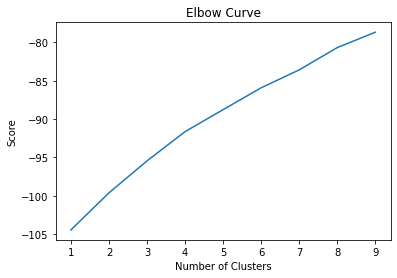

In [54]:
nc = range(1,10)
kmeans = [KMeans(n_clusters = i, n_init = 100, max_iter = 500) for i in nc]
score = [kmeans[i].fit(text).score(text) for i in range(len(kmeans))]
plt.plot(nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Sekarang kita dapat melihat kata-kata yang paling sering dan langka di headline berita berdasarkan skor idf. Semakin kecil nilainya.

In [56]:

K_value = int(input("Enter Optimum K Value = "))      #Write the optimum K-value after seeing the Elbow Graph
km = KMeans(n_clusters = K_value, n_init = 2000, max_iter = 6000)
clusters = km.fit_predict(text)
clusters = list(clusters)
print(clusters)



Enter Optimum K Value =  5


[2, 0, 2, 4, 0, 3, 1, 2, 2, 1, 3, 3, 1, 0, 2, 2, 4, 3, 1, 2, 2, 3, 4, 4, 2, 1, 4, 0, 1, 2, 0, 1, 1, 1, 1, 4, 2, 0, 4, 2, 2, 1, 4, 0, 3, 2, 3, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 3, 4, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 3, 2, 0, 4, 2, 3, 1, 2, 2, 4, 4, 4, 4, 2, 1, 4, 1, 3, 0, 3, 0, 1, 1, 2, 0, 1, 1, 1, 2, 4, 2, 1, 2, 3, 0, 2, 0, 1, 2, 0, 2, 3]


## 5.LSA

Dalam DTM nilainya adalah nilai TFidf.

Saya juga telah menentukan beberapa parameter dari vectorizer Tfidf.

Beberapa poin penting:-

**1) LSA umumnya diimplementasikan dengan nilai Tfidf di mana-mana dan bukan dengan Count Vectorizer.**

**2) max_features bergantung pada daya komputasi Anda dan juga pada eval. metrik (skor koherensi adalah metrik untuk model topik). Coba nilai yang memberikan evaluasi terbaik. metrik dan tidak membatasi kekuatan pemrosesan.**

**3) Nilai default untuk min_df & max_df bekerja dengan baik.**

**4) Dapat mencoba nilai yang berbeda untuk ngram_range.**

**LSA pada dasarnya adalah dekomposisi nilai tunggal.**

**SVD menguraikan DTM asli menjadi tiga matriks S=U.(sigma).(V.T). Di sini matriks U menunjukkan matriks topik-dokumen sedangkan (V) adalah matriks istilah-topik.**

**Setiap baris dari matriks U(matriks term dokumen) adalah representasi vektor dari dokumen yang bersangkutan. Panjang vektor ini adalah jumlah topik yang diinginkan. Representasi vektor untuk suku-suku dalam data kami dapat ditemukan dalam matriks V (matriks istilah-topik).**

Jadi, SVD memberi kita vektor untuk setiap dokumen dan istilah dalam data kita. Panjang setiap vektor adalah k. **Kemudian kita dapat menggunakan vektor-vektor ini untuk menemukan kata dan dokumen serupa menggunakan metode kesamaan kosinus.**

Kita dapat menggunakan fungsi truncatedSVD untuk mengimplementasikan LSA. Parameter n_components adalah jumlah topik yang ingin kita ekstrak.
Model tersebut kemudian di fit dan ditransformasikan pada hasil yang diberikan oleh vectorizer.

**Terakhir perhatikan bahwa LSA dan LSI (I untuk pengindeksan) adalah sama dan yang terakhir hanya terkadang digunakan dalam konteks pencarian informasi.**

In [58]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(text)


In [59]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.24259922  0.35626288  0.00876774 ...  0.15739263  0.17924817
  -0.07415502]
 [ 0.0879472   0.10538597  0.09723987 ... -0.06902131  0.21305421
   0.10198183]
 [ 0.208676    0.2351125  -0.05524176 ... -0.20660846  0.13720685
   0.10527608]
 ...
 [ 0.07863966  0.02526379  0.61290129 ...  0.12662757 -0.19654508
  -0.18041287]
 [ 0.09819265  0.11969525 -0.01368381 ...  0.19511074  0.08979316
  -0.03321131]
 [ 0.43217607 -0.36388528 -0.08319096 ...  0.00589761 -0.07566458
  -0.09095695]]
(111, 10)


In [60]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  24.2599221749277
Topic  1  :  35.62628767841254
Topic  2  :  0.8767742168597015
Topic  3  :  11.543365983463715
Topic  4  :  14.206242241081817
Topic  5  :  24.462087839682685
Topic  6  :  54.321507823183524
Topic  7  :  15.73926263098012
Topic  8  :  17.92481708246775
Topic  9  :  -7.41550190917705


In [61]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 353)
[[ 0.00737026  0.05487759  0.01753502 ...  0.00401451  0.03880133
   0.01753502]
 [ 0.01070812  0.0879254   0.02594752 ...  0.00521727 -0.01205324
   0.02594752]
 [ 0.01400888 -0.01288685 -0.01010724 ... -0.00085158  0.00479894
  -0.01010724]
 ...
 [-0.01556266 -0.07369938  0.02103798 ...  0.00894714  0.15833139
   0.02103798]
 [ 0.0512685   0.07354274 -0.02305408 ...  0.00358311  0.20413057
  -0.02305408]
 [ 0.0263244  -0.07037902  0.08327155 ...  0.04882252 -0.05247759
   0.08327155]]


In [63]:
# most important words for each topic
vocab = count_vectorizer.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
pengaruh kerja putus beli produk studi madura trunojoyo universitas karyawan 

Topic 1: 
kerja karyawan pt produktivitas bangkal cabang indonesia puas prestasi organisasi 

Topic 2: 
saham usaha bei daftar bursa efek asset ratio indonesia periode 

Topic 3: 
madura trunojoyo universitas mahasiswa ekonomi fakultas online bisnis karyawan merek 

Topic 4: 
produk atribut beli bangkal kamal putus organisasi karyawan masako robatal 

Topic 5: 
bangkal perilaku produktivitas organisasi konsumen iklim kabupaten budaya emis anak 

Topic 6: 
kantor persero pos cabang indonesia pamekasan daya manusia sumber pt 

Topic 7: 
baur pasar wisatawan kakek kawasan objek pariwisata unjung cabang pilih 

Topic 8: 
promosi wisatawan sumenep baur kunjung lombang pantai indonesia persero putus 

Topic 9: 
organisasi efektif analisis produktivitas komunikasi saing iklim produk koperasi kota 

